# Practice

In [7]:
from tensorly.decomposition import parafac
X = tl.tensor(np.arange(24).reshape((3, 4, 2)))

In [8]:
from tensorly.decomposition import tucker, partial_tucker

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

from skimage.transform import resize
from skimage.data import astronaut, chelsea
from matplotlib.pyplot import imread

image2 = np.array(astronaut(), dtype=np.float64)


# Completion

Our task is to restore image after missing more than half of information. 

We have an image of austrinaut:



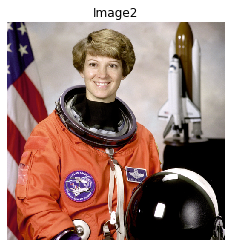

In [9]:
show_im(image2, "Image2")

Let's remove 60% of pixels:

In [23]:
arr = np.random.binomial(1, 0.3, image2.shape)
null_one_tensor = tl.tensor(arr)
currupted_im = image2*arr

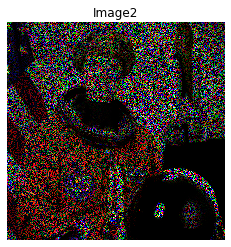

In [24]:
show_im(currupted_im, "Image2")

Try you favorite decomposition to decompose and reconstruct 3-dimentional tensor. Try different values of core shape.

The results isn't representable, yes?

So we can do the following:

*
* do partial_tucker along several axes (along what axes? why?)
* count norm ro every reconstructed image to evaluate approach

In [ ]:
core, factors = tucker(currupted_im, ranks=[160, 160, 3])
rec1 = tl.tucker_to_tensor((core, factors))

In [26]:
from skimage.transform import AffineTransform, warp

def shift(image, vector):
    transform = AffineTransform(translation=vector)
    shifted = warp(image, transform, mode='wrap', preserve_range=True)

    shifted = shifted.astype(image.dtype)
    return shifted

In [27]:
image2.shape

(512, 512, 3)

In [28]:
shifted_im_list = [image2]
for x_shift in [-2, -1, 0, 1, 2]:
    for y_shift in [-2, -1, 0, 1, 2]:
        sh_i = shift(image2, (x_shift, y_shift))
        shifted_im_list.append(sh_i)
        

In [30]:
tensor = tl.concatenate([elem[None, ...] for elem in shifted_im_list], axis=0)
tensor.shape

(26, 512, 512, 3)

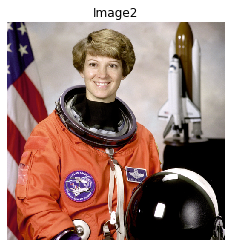

In [31]:
show_im(tensor[0], "Image2")

**delete 60 % of information in tensor**

In [32]:
np.random.binomial(1, 0.2, 10)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [33]:
arr = np.random.binomial(1, 0.3, tensor.shape)
null_one_tensor = tl.tensor(arr)
currupted_im = tensor*null_one_tensor

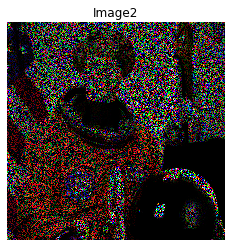

In [34]:
show_im(currupted_im[0], "Image2")

In [67]:
core, factors = partial_tucker(currupted_im, ranks=[60, 60, 3], modes=[1, 2, 3])

In [68]:
core1 = tl.tenalg.multi_mode_dot(image2, factors, transpose=True)
recim = tl.tucker_to_tensor((core1, factors))

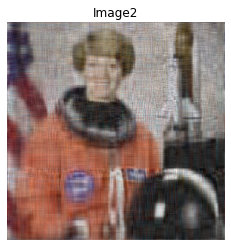

In [69]:
show_im(recim, "Image2")

In [70]:
core, factors = partial_tucker(currupted_im, ranks=[7, 100, 100], modes=[0, 1, 2])

In [71]:
print (factors[0].shape, factors[1].shape, factors[2].shape)

(26, 7) (512, 100) (512, 100)


In [72]:
image2.shape

(512, 512, 3)

In [73]:
currupted_im[:,:,:,0].shape

(26, 512, 512)

In [74]:
core_red = tl.tenalg.multi_mode_dot(currupted_im[:,:,:,0], factors, transpose=True)
rec_red = tl.tucker_to_tensor((core_red, factors))
core_green = tl.tenalg.multi_mode_dot(currupted_im[:,:,:,1], factors, transpose=True)
rec_green = tl.tucker_to_tensor((core_green, factors))
core_blue = tl.tenalg.multi_mode_dot(currupted_im[:,:,:,2], factors, transpose=True)
rec_blue = tl.tucker_to_tensor((core_blue, factors))


In [75]:
rec_blue.shape

(26, 512, 512)

In [76]:
tensor = tl.concatenate([rec_red[:,:,:,None], rec_green[:,:,:,None], rec_blue[:,:,:,None]], axis=3)
tensor.shape

(26, 512, 512, 3)

In [83]:
tensor.shape

(26, 512, 512, 3)

In [85]:
core, factors = partial_tucker(tensor, ranks=[50, 50, 3], modes=[1, 2, 3])


In [86]:
core_n = tl.tenalg.multi_mode_dot(image2, factors, transpose=True)
rec_n = tl.tucker_to_tensor((core_n, factors))

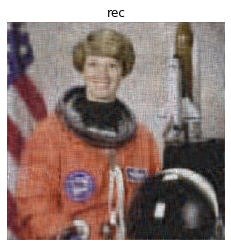

In [87]:
show_im(rec_n, "rec")

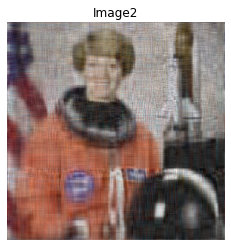

In [88]:
show_im(recim, "Image2")

In [89]:
print (tl.norm(rec_n - image2, 2))

30655.52570517901


In [90]:
print (tl.norm(recim - image2, 2))

33612.38732629027


In [94]:
s = rec_n - image2
type(s)

numpy.ndarray